In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import string


# Manipulating Text and File I/O

So a cool thing about this is that we can work with files in a very natural way.  For example, I can import text files such as 'beyonce.txt' and then print the lines by writing the following 

In [2]:
queen_bee = open('beyonce.txt')
count = 0
for line in queen_bee:
    count += 1
    print "The line number is %d." % count
    print line
queen_bee.close()

The line number is 1.
Nothing else seems to hurt like the smile on your face when it is only in my memory.  

The line number is 2.
I am the dragon breathing fire, beautiful mane, I'm the lion.

The line number is 3.
Our love was stronger than your pride. 

The line number is 4.
You don't deserve my tears, I guess that's why they ain't there. 


So we see that yes, the text file is treated as a series of lines. And in terms of reading the lines, that is also straightforward.

In [8]:
queen_bee = open('beyonce.txt')
for line in queen_bee:
    line = line.rstrip() # Remove trailing white space
    words = line.split('s') # Turns the line into a list of words
    print words
    print line
    print
queen_bee.close()

['Nothing el', 'e ', 'eem', ' to hurt like the ', 'mile on your face when it i', ' only in my memory.']
Nothing else seems to hurt like the smile on your face when it is only in my memory.

["I am the dragon breathing fire, beautiful mane, I'm the lion."]
I am the dragon breathing fire, beautiful mane, I'm the lion.

['Our love wa', ' ', 'tronger than your pride.']
Our love was stronger than your pride.

["You don't de", 'erve my tear', ', I gue', '', " that'", " why they ain't there."]
You don't deserve my tears, I guess that's why they ain't there.



We can then readily start answering various questions.  Like, what if we want to print out only those lines that contain the word 'fire' in them.  Then what we do is the following

In [7]:
queen_bee = open('beyonce.txt')
for line in queen_bee:
    line = line.rstrip() # Remove trailing white space
    words = line.split('s') # Turns the line into a list of words by breaking line up across spaces.
    if "fire" in words:
        print line
queen_bee.close()

Okay, that didn't do anything.  Why not?  Write the code that will actually do something.

In [ ]:
queen_bee = open('beyonce.txt')
for line in queen_bee:
    line = line.rstrip() # Remove trailing white space
    words = line.split('s') # Turns the line into a list of words by breaking line up across spaces.
    if "fire," in words:
        print line
queen_bee.close()

So maybe we also want to process each line not just into words, but remove punctuation marks. How would you do this for just commas?

In [9]:
queen_bee = open('beyonce.txt')

for line in queen_bee:
    line = line.rstrip() # Remove trailing white space
    words = line.split() # Turns the line into a list of words by breaking line up across spaces.
    cnt = 0
    for word in words:
        if "," in word:
            words[cnt] = word[0:len(word)-1] # Thus, we change the list element, not the word itself.
        cnt+=1
    if "fire" in words:
        print line

queen_bee.close()

I am the dragon breathing fire, beautiful mane, I'm the lion.


## More Text Processing

Let us build a function whose job it is to provide a histogram of the letters in a given body of text.  Along the way, we need to build helper functions which the main function will call.  But let's get a template of an idea down first.  

We want to pass in a filename, say "juliet.txt" or "beyonce.txt", and then get a plot of the frequency with which different letters appear.  We should return the distribution as a list.

But okay, we want to do a frequency analysis of letters.  That means we want to get rid of punctuation.  So we need to develop a helper function which takes a list of words, strips the punctuation while keeping all the letters.  

Now note, because we have Shakespeare to analyze, we have to allow that things like apostrophes can come at almost any point in the word.  So be careful.  Your helper function should return a list of words with no punctuation.  You will need to use the string helper function

`word.isalnum()`

which tests if a string consists only of alpha/numeric characters.  Also, don't forget about good stuff like 

 `word.append(char)`

In [1]:
def punc_remove(words):
    ind = 0
    for word in words:
            # Here is where you need to start introducing code.
            if word.isalnum() == False:
                wordt = []
                for char in word:
                    if char.isalnum():
                        wordt.append(char)
                delimeter = ""
                words[ind] = delimeter.join(wordt) # Note the absence of a return statement since we rely
                                                   # on pass by reference to modify words both within
                                                   # the function and then used afterwards in its 
                                                   # modified form.
            ind+=1

We then need to think about lower and upper case.  So, we would like a helper function which takes a list of words and converts everything to upper case.  Note, you will need to make use of the string helper function

`word.upper()`

which makes every character in a string uppercase. 

In [2]:
def make_upper(words):
    ind = 0
    for word in words:
        words[ind] = word.upper()
        ind += 1

Okay, now the hard part.  We need to build a helper function which is able to take a given string or word, and a list which is keeping track of the frequency of occurences of each letter.  To do this, we need to make use of what are called _ dictionaries _.  A good way to see the use of them is to realize that if I give you a word, and you wanted to keep track of which letters appeared in it, you would probably think to write something like 

In [ ]:
def letter_cnt(word,freq):
    for let in word:
        if let == 'A': freq[0]+=1
        elif let == 'B': freq[1]+=1
        elif let == 'C': freq[2]+=1
        elif let == 'D': freq[3]+=1
        elif let == 'E': freq[4]+=1
        elif let == 'F': freq[5]+=1
        elif let == 'G': freq[6]+=1
        elif let == 'H': freq[7]+=1
        elif let == 'I': freq[8]+=1
        elif let == 'J': freq[9]+=1
        elif let == 'K': freq[10]+=1
        elif let == 'L': freq[11]+=1
        elif let == 'M': freq[12]+=1
        elif let == 'N': freq[13]+=1
        elif let == 'O': freq[14]+=1
        elif let == 'P': freq[15]+=1
        elif let == 'Q': freq[16]+=1
        elif let == 'R': freq[17]+=1
        elif let == 'S': freq[18]+=1
        elif let == 'T': freq[19]+=1
        elif let == 'U': freq[20]+=1
        elif let == 'V': freq[21]+=1   
        elif let == 'W': freq[22]+=1
        elif let == 'X': freq[23]+=1
        elif let == 'Y': freq[24]+=1
        elif let == 'Z': freq[25]+=1        

So, um, just no.  This is not how anyone in the modern era should code.  Ever.  This is not good code.  To, radically, improve it, we use a dictionary.  The idea behind a dictionary is to generalize the notion of a list such that you no longer have integer valued indices to refer to elements.  Instead, you have *keys*.  So following the book, we can build a dictionary whose keys are universities, and whose *values* are mascot names.  We do this by writing 

In [3]:
mascots={'CSUN': 'Matty_Matador',
         'Florida':'Gators',
         'Irvine':'Anteater'}

Thus, if we type 

In [5]:
print mascots['CSUN']
print mascots['Irvine']

Matty_Matador
Anteater


So why is this useful?  Well, let's suppose that we want to keep track of how many times each letter is used.  A good way to do this would be to build a dictionary with letters for keys and the count as values.  To do this, we do the following

In [6]:
alpha = list(string.uppercase[:26])
freq_d = dict()
for let in alpha: freq_d[let] = 0

In [9]:
print freq_d.values()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


So what does this do?  Well, first, we want a list of all possible upper case letters.  That we do with the list alpha, which being more explicit we see

In [7]:
print list(string.uppercase[:26])

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
def letter_cnt(word,freq_d):
    for let in word: freq_d[let]+=1        

In [13]:
def txt_cntr(file_name):
    fname = open(file_name)
    alpha = list(string.uppercase[:26])
    freq_d = dict()
    freq = np.zeros(26)
    
    for let in alpha: freq_d[let] = 0
        
    for line in fname:
        line = line.rstrip()
        words = line.split()
        punc_remove(words)
        make_upper(words)
        for word in words:
            letter_cnt(word,freq_d)
    
    ind = 0
    for let in alpha:
        freq[ind] = freq_d[let]
        ind += 1
    
    fname.close()
    
    return freq

<Container object of 26 artists>

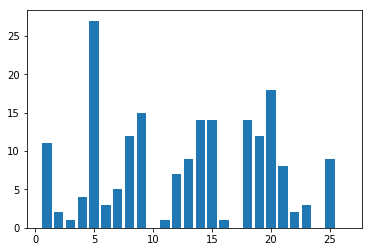

In [18]:
freq_cnt = txt_cntr('beyonce.txt')
lvals = np.linspace(1,26,26)
plt.bar(lvals,freq_cnt)